<a href="https://colab.research.google.com/github/For-Chance/CourseOfConstructionInformation/blob/master/FinalTask/solution_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Task
> Name: Student ID:   <br>
> **A person a group** <br>
> link: https://github.com/For-Chance/CourseOfConstructionInformation/blob/master/FinalTask/solution.ipynb   <br>
> Since this task uses many complex modules, it is best to run this notebook with colab.

In [ ]:
%%capture
# If there is data in the file directory, 
# then you can comment out the following two lines.
!apt install subversion
!svn checkout https://github.com/For-Chance/CourseOfConstructionInformation/trunk/FinalTask/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Part 1 —— Data Analysis

In [ ]:
trans = pd.read_csv('./data/transactions.csv')
agency = pd.read_csv('./data/agency.csv')
agents = pd.read_csv('./data/agents.csv')

df = pd.merge(agency, agents)
df = pd.merge(df, trans)
df.head()

,AgencyId,Name,AgentId,FirstName,LastName,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0,Other,0,Other,Other,2012.667,20.4,2469.64500,4,24.96108,121.51046,23.8
1,0,Other,0,Other,Other,2013.167,16.2,289.32480,5,24.98203,121.54348,46.2
2,0,Other,0,Other,Other,2012.667,29.4,4510.35900,1,24.94925,121.49542,13.2
3,0,Other,0,Other,Other,2012.833,31.7,1160.63200,0,24.94968,121.53009,13.7
4,0,Other,0,Other,Other,2013.583,6.6,90.45606,9,24.97433,121.54310,59.0


### 1.1 Task 1 —— 5 points
> Prepare a table that presents how many transactions were conducted by each agency. The results should be sorted by the number of transactions - descending. Each row of your table shall contain at least a number of transactions and the name of the agency.

In [ ]:
# group
AgcyTrans = df.groupby('Name').agg({'Name': 'count'})

# rename
AgcyTrans.index.name = 'Agency'
AgcyTrans = AgcyTrans.rename(columns = {'Name': 'Number of Transcations'})

# sort
AgcyTrans = AgcyTrans.sort_values('Number of Transcations', ascending=False)

AgcyTrans

,Number of Transcations
Agency,
Your Estate,225
Lovely Housing,150
Other,39


### 1.2 Task 2 —— 5 points
> Prepare a table that presents the mean house price of the unit area for each agent (mean value of column Y for each agent). The results shall be sorted by the mean price - descending. 

In [ ]:
# group
AgtPrice = df.groupby(['AgentId']).agg({'Y house price of unit area': 'mean'})

# rename
AgtPrice = AgtPrice.rename(columns = {
    'Y house price of unit area': 'Mean House Price of the Unit Area'
    })

# sort
AgtPrice = AgtPrice.sort_values('Mean House Price of the Unit Area', ascending=False)

AgtPrice

,Mean House Price of the Unit Area
AgentId,
5,41.797727
1,38.694595
4,38.176316
3,37.961290
2,36.242045
0,35.902564


### 1.3 Task 3 —— 5 points
> Prepare a table that presents the mean house price of the unit area for each agency and for each year. The results shall be sorted by the year (ascending) and then by the name of the agency. 
Hint: You may want to add a new column with year only, to solve this task.

In [ ]:
AgtYearPrice = df[['X1 transaction date','Name','Y house price of unit area']].copy()
AgtYearPrice['X1 transaction date'] = AgtYearPrice['X1 transaction date'].astype(int)

# rename
AgtYearPrice = AgtYearPrice.rename(columns={
    'X1 transaction date': 'Year', 
    'Name': 'Name of Agency', 
    'Y house price of unit area': 'Mean House Price of Unit Area'})

# group
AgtYearPrice = AgtYearPrice.groupby(['Year','Name of Agency']).agg({
    'Mean House Price of Unit Area': 'mean'
    })

# sort
AgtYearPrice = AgtYearPrice.sort_values(['Year', 'Name of Agency'])

AgtYearPrice

Mean House Price of Unit Area
Year Name of Agency                               
2012 Lovely Housing                      38.217391
     Other                               32.154545
     Your Estate                         35.691304
2013 Lovely Housing                      38.526923
     Other                               37.375000
     Your Estate                         39.077564

### 1.4 Task 4 —— 5 points
> Prepare a chart that presents the results of task 3. 

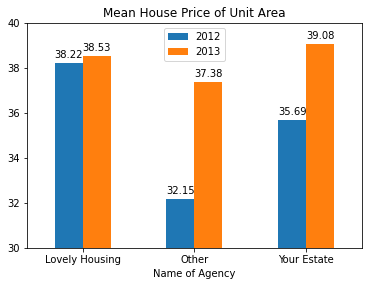

In [ ]:
year2012 = AgtYearPrice.loc[2012,'Mean House Price of Unit Area']
year2013 = AgtYearPrice.loc[2013,'Mean House Price of Unit Area']
index = AgtYearPrice.loc[2012].index.tolist()
pd.DataFrame({'2012': year2012, '2013': year2013}, index=index).plot.bar(rot=0).grid(False) 
plt.title('Mean House Price of Unit Area')
plt.xlabel('Name of Agency')
plt.subplots_adjust(bottom=0.1)
ymin=30
ymax=40
plt.ylim(ymin,ymax)
plt.legend()

def add_value_label(x_list,y_list,isleft):
  for i in range(0, len(x_list)):
    label = "{:.2f}".format(y_list[i])
    plt.annotate(label,(i,y_list[i]),textcoords="offset points",xytext=(-isleft*28,5))

add_value_label(index,year2012,1)
add_value_label(index,year2013,0)

## 2 Part 2 —— Machine learning
> For this part, your goal is to prepare, train and test the Machine Learning model that can estimate the 
house price of unit area. 

In [ ]:
trans = pd.read_csv('./data/transactions.csv')
agency = pd.read_csv('./data/agency.csv')
agents = pd.read_csv('./data/agents.csv')

# Merge tables
df = pd.merge(agency, agents)
df = pd.merge(df, trans)

# Drop meaningless column
df = df.drop(['Name','FirstName','LastName'], axis = 1)

# Rename
df.rename(columns = {
    'X1 transaction date': 'X1',
    'X2 house age': 'X2',
    'X3 distance to the nearest MRT station': 'X3',
    'X4 number of convenience stores': 'X4',
    'X5 latitude': 'X5',
    'X6 longitude': 'X6',
    'Y house price of unit area':'Y'}, inplace=True)

source = df.copy()
df.head()

,AgencyId,AgentId,X1,X2,X3,X4,X5,X6,Y
0,0,0,2012.667,20.4,2469.64500,4,24.96108,121.51046,23.8
1,0,0,2013.167,16.2,289.32480,5,24.98203,121.54348,46.2
2,0,0,2012.667,29.4,4510.35900,1,24.94925,121.49542,13.2
3,0,0,2012.833,31.7,1160.63200,0,24.94968,121.53009,13.7
4,0,0,2013.583,6.6,90.45606,9,24.97433,121.54310,59.0


### 2.1 Task 5 —— 10 points
> Select the features and labels (X and y) from your dataset. Make sure that your selection is reasonable. 
Split the data into two datasets (training and testing).

#### 2.1.1 Add Feature

According to X5-latitude and X6-longitude, the figure below shows the relationship between location and house price.

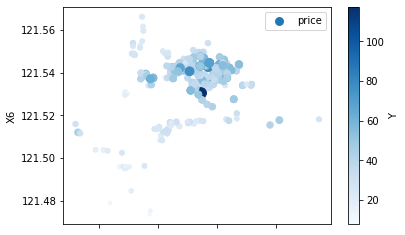

In [ ]:
df.plot(
    kind='scatter',x='X5',y='X6',alpha=1,s=df['Y'], 
    c='Y', label='price', colormap='Blues',colorbar=True)
plt.legend();

> As we can see, house price is definitely not decided independently by latitude or longitude, but the spatial location. Besides, the figure shows that the farther away from the downtown, house price more expensive. Therefore, we according to the following formula downtown location.
$$
center_x = \frac{∑ x_i P }{∑ P} \\
center_y = \frac{∑ y_i P }{∑ P}
$$
where $(x_i,y_i)$ represents the location of one house, and $P$ is corresponding house price.

In [ ]:
# define downtown location
# and define the distance of each house with downtown as X7
center_x = sum(df['X5'] * df['Y']) / df['Y'].sum()
center_y = sum(df['X6'] * df['Y']) / df['Y'].sum()
# A unit of longitude is about 100 km
df['X7'] = ((df['X5']-center_x)**2+(df['X6']-center_y)**2)**0.5 * 100000    
df = df.drop(columns=['X5', 'X6'])
print(f'downtown loation is ({center_x:.4f}, {center_y:.4f})')
df.head()

downtown loation is (24.9715, 121.5362)


,AgencyId,AgentId,X1,X2,X3,X4,Y,X7
0,0,0,2012.667,20.4,2469.64500,4,23.8,2778.053397
1,0,0,2013.167,16.2,289.32480,5,46.2,1282.246917
2,0,0,2012.667,29.4,4510.35900,1,13.2,4646.003385
3,0,0,2012.833,31.7,1160.63200,0,13.7,2262.259333
4,0,0,2013.583,6.6,90.45606,9,59.0,744.690602


#### 2.1.2 Select Features

In [ ]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['AgencyId','AgentId']) 
df.head()

,X1,X2,X3,X4,Y,X7,AgencyId_0,AgencyId_1,AgencyId_2,AgentId_0,AgentId_1,AgentId_2,AgentId_3,AgentId_4,AgentId_5
0,2012.667,20.4,2469.64500,4,23.8,2778.053397,1,0,0,1,0,0,0,0,0
1,2013.167,16.2,289.32480,5,46.2,1282.246917,1,0,0,1,0,0,0,0,0
2,2012.667,29.4,4510.35900,1,13.2,4646.003385,1,0,0,1,0,0,0,0,0
3,2012.833,31.7,1160.63200,0,13.7,2262.259333,1,0,0,1,0,0,0,0,0
4,2013.583,6.6,90.45606,9,59.0,744.690602,1,0,0,1,0,0,0,0,0


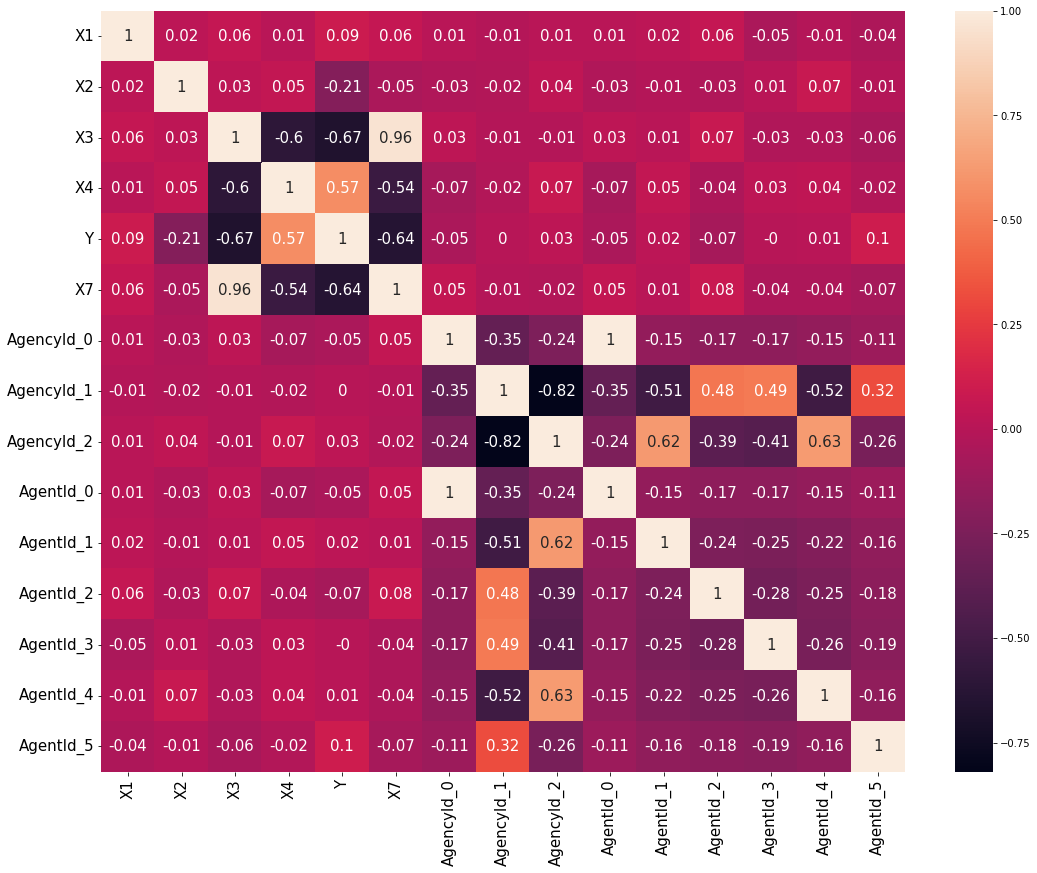

In [ ]:
# Correlation Matrix
import seaborn as sns
plt.subplots(figsize=(18, 14))
sns.heatmap(df.corr().round(2),annot=True,annot_kws={"fontsize":15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

According to the column of Y, X3, X4, X5, X6 and X7 have certain relevance with house price. Because X7 combines the X5 and X6, we choose X3, X4, X7 as appropriate features. 

In [ ]:
df = df[['X3','X4','X7','Y']]
df.head()

,X3,X4,X7,Y
0,2469.64500,4,2778.053397,23.8
1,289.32480,5,1282.246917,46.2
2,4510.35900,1,4646.003385,13.2
3,1160.63200,0,2262.259333,13.7
4,90.45606,9,744.690602,59.0


#### 2.1.3 Remove Outliers

df shape: (414, 4)


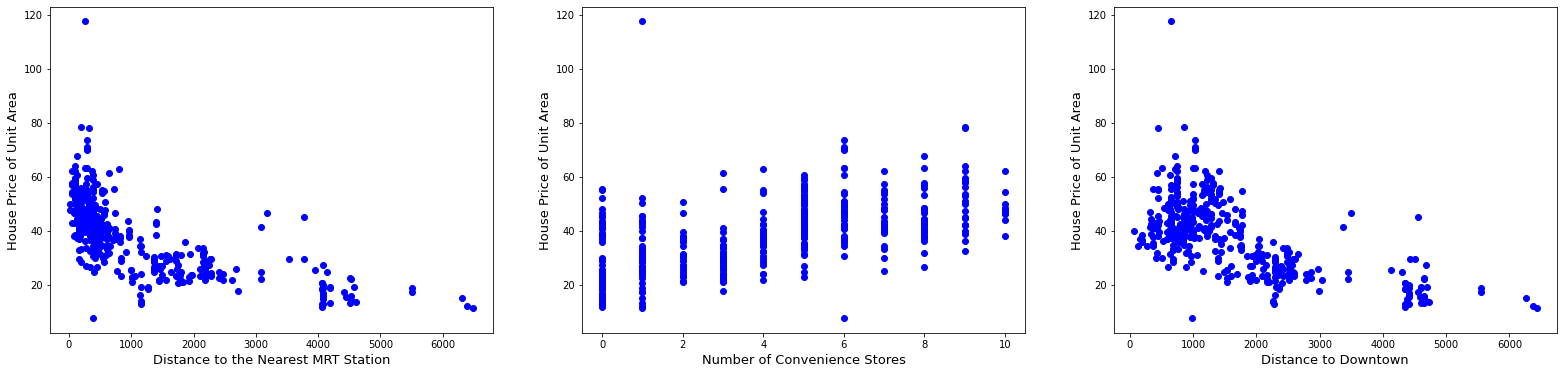

In [ ]:
# Draw a scatter diagram to check the outliers
def plotScatter():
  plt.figure(figsize=(27, 6))

  plt.subplot(1, 3, 1)
  plt.scatter(x=df.X3, y=df.Y, color='b')
  plt.xlabel("Distance to the Nearest MRT Station", fontsize=13)
  plt.ylabel("House Price of Unit Area", fontsize=13)

  plt.subplot(1, 3, 2)
  plt.scatter(x=df.X4, y=df.Y, color='b')
  plt.xlabel("Number of Convenience Stores", fontsize=13)
  plt.ylabel("House Price of Unit Area", fontsize=13)

  plt.subplot(1, 3, 3)
  plt.scatter(x=df.X7, y=df.Y, color='b')
  plt.xlabel("Distance to Downtown", fontsize=13)
  plt.ylabel("House Price of Unit Area", fontsize=13)

print(f'df shape: {df.shape}')
plotScatter()


Assumes that the data meet normal distribution, we can use 3 $\sigma$ principle to remove outliers.

df shape: (408, 4)


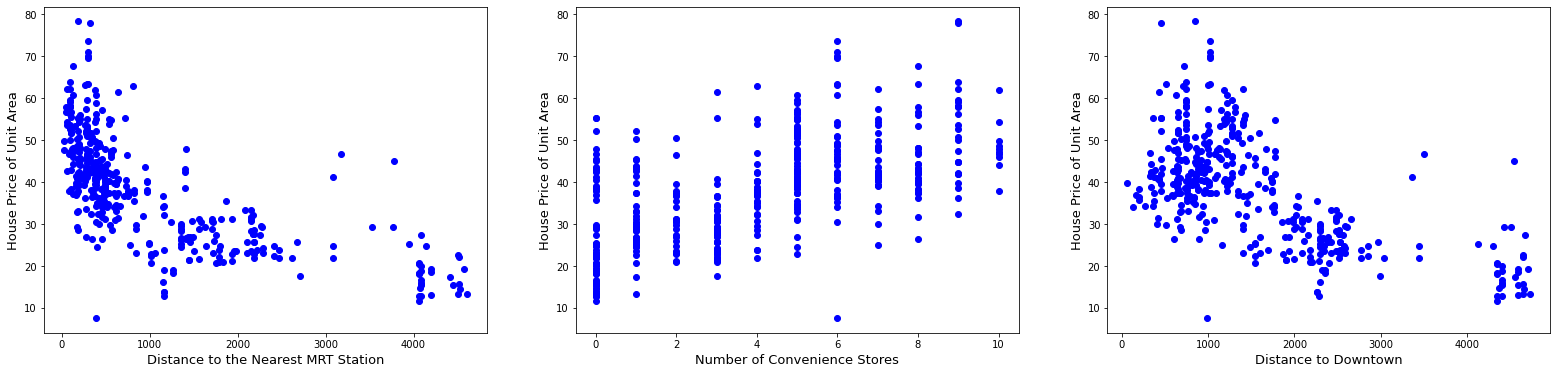

In [ ]:
# Remove outliers
def remove_outliers(df, columns=[]):
  mean, std = df.mean(), df.std()
  cut_off = std * 3
  lower, upper = mean - cut_off, mean + cut_off

  for col in columns:
    df = df[(df[col] > lower[col]) & (df[col] < upper[col])]
  return df

df = remove_outliers(df, columns=['X3','X4','X7','Y'])
print(f'df shape: {df.shape}')
plotScatter()

#### 2.1.4 Adjust Object Variable

In [ ]:
from scipy.stats import norm
from scipy import stats

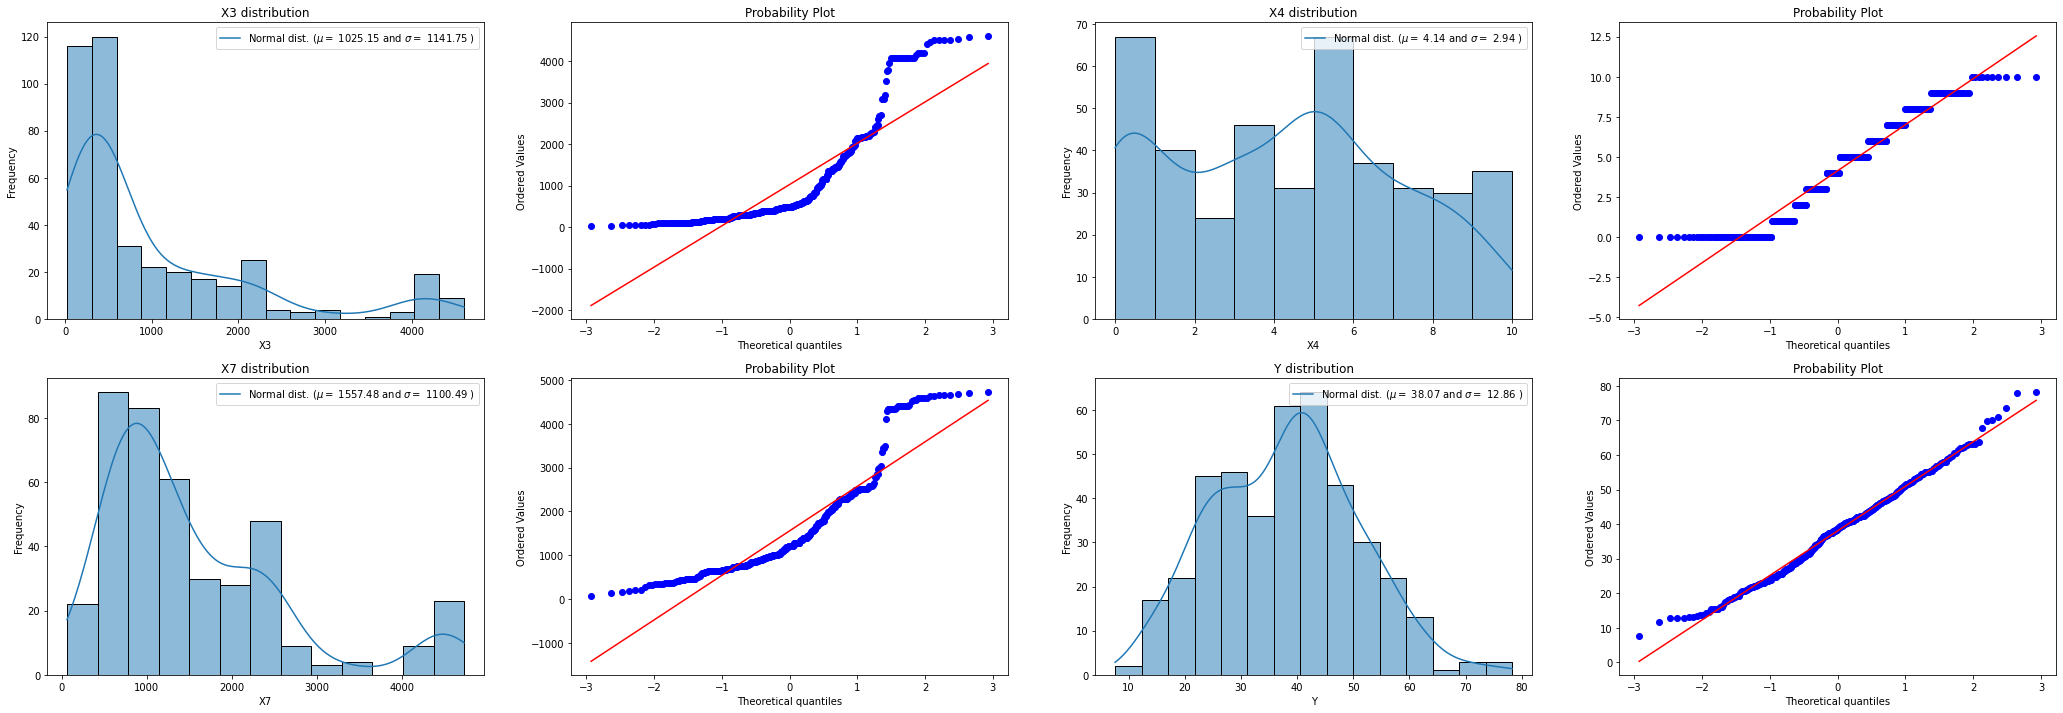

In [ ]:
def plt_distribution(data):
  """Plot the distribution"""
  plt.figure(figsize=(36,12))

  cnt = 0
  for col in data:
    plt.subplot(2,4,2*cnt+1)
    sns.histplot(data[col], kde=True);

    (mu, sigma) = norm.fit(data[col])
    # print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    plt.legend(
        ['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
        loc='best')
    plt.ylabel('Frequency')
    plt.title(f'{col} distribution')

    plt.subplot(2,4,2*cnt+2)
    stats.probplot(data[col], plot=plt)
    cnt += 1
plt_distribution(df)

As we can see, X3 and X7 don't meet normalization. So we need to adjust them.

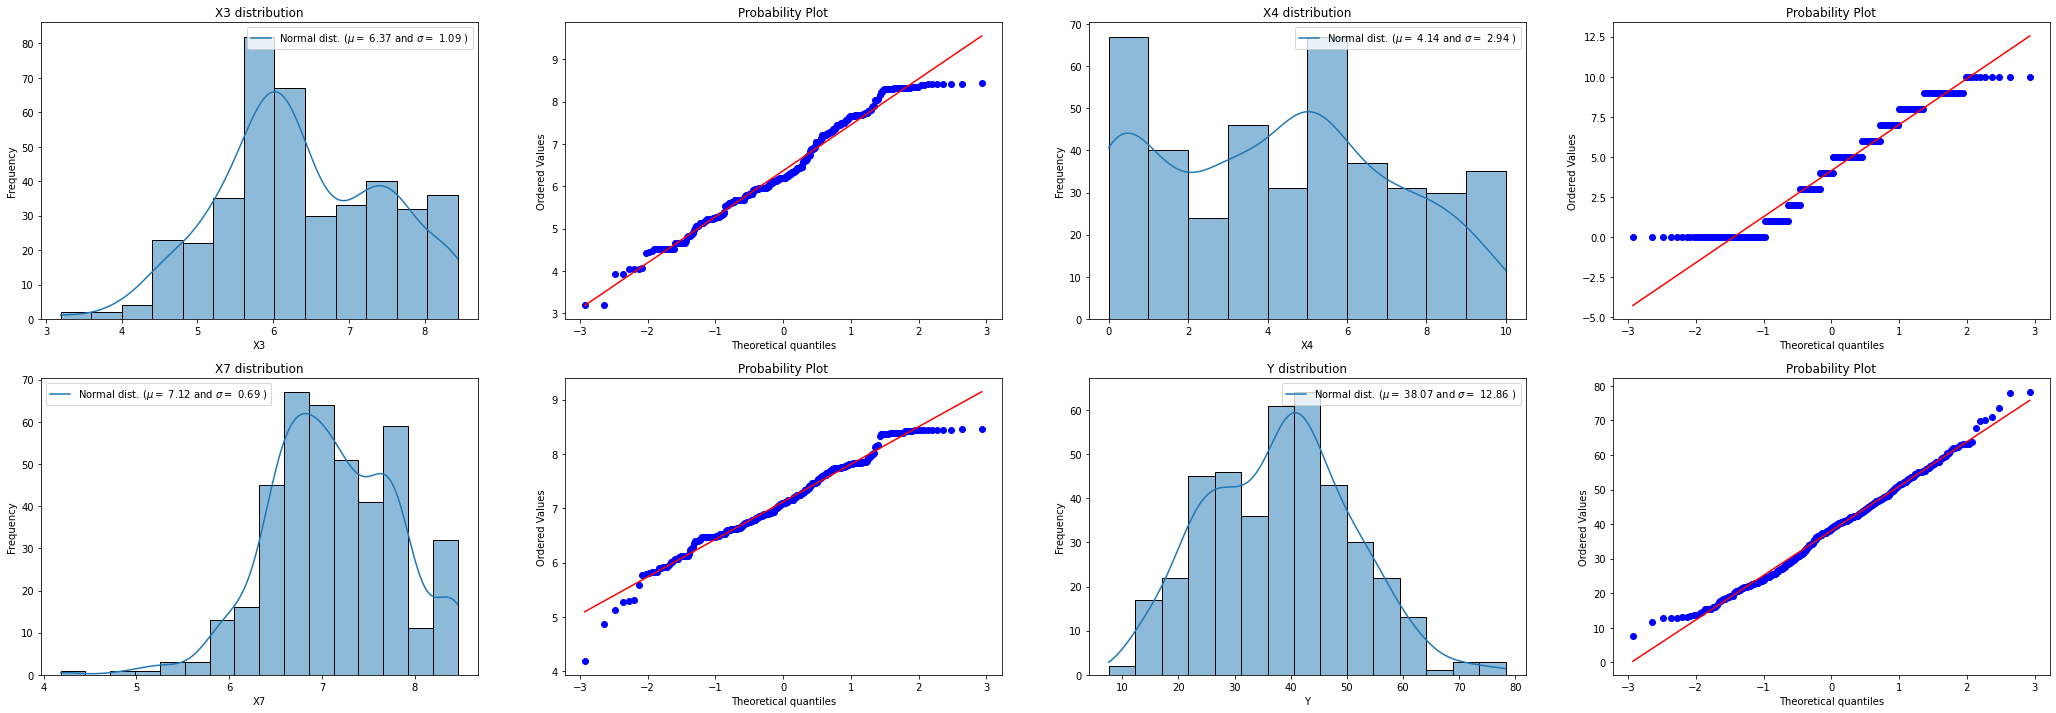

In [ ]:
df['X3'] = np.log1p(df['X3'])
df['X7'] = np.log1p(df['X7'])
df.head()
plt_distribution(df)

> 

### 2.2 Task 6 —— 10 points
> Prepare the Machine Learning model, then train and test this model. For this task, you should provide your code in Python as well as the accuracy of the model. As an accuracy, you should report Mean Absolute Error and Mean Absolute Percentage Error. You may also report other metrics (R2, SMAPE, MSE) but this is not necessary.

Calculation formula of metrics is as follows:
$$
MAE=\frac{1}{n}\sum_{i=1}^n|\frac{\hat{y_i}-y_i}{y_i}|
$$
$$
MAPE=\frac{100\%}{n}\sum_{i=1}^n|\frac{\hat{y_i}-y_i}{y_i}|
$$
$$
R2=1-\frac{\sum_{i=1}^{n}(\hat{y_i}-y_i)^2}{\sum_{i=1}^{n}(\overline{y}-y_i)^2}
$$
$$
SMAPE=\frac{100\%}{n}\sum_{i=1}^n\frac{|\hat{y_i}-y_i|}{(|y_i|+|\hat{y_i}|)/2}
$$
$$
MSE=\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y_i})^2
$$
where $\hat{y_i}$ is the predicted value, $y_i$ is the true value and $\overline{y}$ is the mean value.**The better a model，the smaller the value of MAE, MAPE, SMAPE and MSE and the bigger the value of R2.**

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score  #R square

def get_mae(y, pred):
  return metrics.mean_absolute_error(y, pred)

def get_mape(y, pred):
  return np.mean(100 * np.abs((y-pred) / y))
# reload
def get_mape_model(model, X, y):
    pred = model.predict(X)
    return np.mean(100 * np.abs((y-pred) / y))

def get_R2(y, pred):
  return r2_score(y, pred)

def get_smape(y, pred):
  return 2.0 * np.mean(np.abs(pred - y) / (np.abs(pred) + np.abs(y))) * 100

def get_mse(y, pred):
  return metrics.mean_squared_error(y, pred)


def show_result(model, X_train, y_train, X_test, y_test):
  print("\t\tMAE\tMAPE\tR2\tSMAPE\tMSE")
  pred = model.predict(X_train)
  print(f"Train accurary:\t{get_mae(y_train, pred):.2f} \
  \t{get_mape(y_train, pred):.2f}%\t{get_R2(y_train, pred):.2f} \
  \t{get_smape(y_train, pred):.2f}%\t{get_mse(y_train, pred):.2f}")
  pred = model.predict(X_test)
  print(f"Test accurary:\t{get_mae(y_test, pred):.2f} \
  \t{get_mape(y_test, pred):.2f}%\t{get_R2(y_test, pred):.2f} \
  \t{get_smape(y_test, pred):.2f}%\t{get_mse(y_test, pred):.2f}")

Define a class to search hyperparameters with grid method.

In [ ]:
from sklearn.model_selection import GridSearchCV
class grid():
  def __init__(self,model):
    self.model = model
  
  def grid_get(self,X,y,param_grid):
    grid_search = GridSearchCV(
        self.model,param_grid,cv=5,scoring="neg_mean_squared_error")
    grid_search.fit(X,y)
    print(f'Best Params: {grid_search.best_params_}, \
    RMSE: {np.sqrt(-grid_search.best_score_):.4f}')

#### 2.2.1 Linear Model
> Before start this, it need the process of Task 5 and use the selected features. Well, it's no problem as long as executing the above code in order.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet, BayesianRidge

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['X3','X4','X7']].copy()
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1)

# normalize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

X train shape: (306, 3)
X test shape: (102, 3)
y train shape: (306,)
y test shape: (102,)


In [ ]:
# Search hyperparameter
print("Ridge:")
param_grid = {'alpha':[35,40,45,50,55,60,65,70,80,90]}
grid(Ridge()).grid_get(X_train, y_train, param_grid)
print("Lasso:")
param_grid = {
    'alpha': [0.0004,0.0005,0.0006,0.0007,0.0008,0.0009],
    'max_iter':[10000],
    'random_state':[1]}
grid(Lasso()).grid_get(X_train, y_train, param_grid)
print("ElasticNet:")
param_grid = {
    'alpha':[0.0005,0.0008,0.004,0.005],
    'l1_ratio':[0.08,0.1,0.3,0.5,0.7],
    'max_iter':[10000],
    'random_state':[1]}
grid(ElasticNet()).grid_get(X_train, y_train, param_grid)

Ridge:
Best Params: {'alpha': 35},     RMSE: 8.8005
Lasso:
Best Params: {'alpha': 0.0009, 'max_iter': 10000, 'random_state': 1},     RMSE: 8.7729
ElasticNet:
Best Params: {'alpha': 0.005, 'l1_ratio': 0.08, 'max_iter': 10000, 'random_state': 1},     RMSE: 8.7718


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print("LinearRegression:")
show_result(model, X_train, y_train, X_test, y_test)

model = Ridge(alpha=34)
model.fit(X_train, y_train)
print("\nRidge:")
show_result(model, X_train, y_train, X_test, y_test)

model = Lasso(alpha=0.004,max_iter=10000,random_state=1)
model.fit(X_train, y_train)
print("\nLasso:")
show_result(model, X_train, y_train, X_test, y_test)

model = ElasticNet(
    alpha=0.005,l1_ratio=0.08,max_iter=10000,random_state=1)
model.fit(X_train, y_train)
print("\nElasticNet:")
show_result(model, X_train, y_train, X_test, y_test)

model = BayesianRidge()
model.fit(X_train, y_train)
print("\nBayesianRidge:")
show_result(model, X_train, y_train, X_test, y_test)

LinearRegression:
		MAE	MAPE	R2	SMAPE	MSE
Train accurary:	6.48   	18.36%	0.57   	17.39%	74.90
Test accurary:	5.33   	19.83%	0.59   	15.22%	55.96

Ridge:
		MAE	MAPE	R2	SMAPE	MSE
Train accurary:	6.59   	18.82%	0.57   	17.74%	75.48
Test accurary:	5.42   	20.28%	0.59   	15.62%	55.66

Lasso:
		MAE	MAPE	R2	SMAPE	MSE
Train accurary:	6.48   	18.36%	0.57   	17.39%	74.90
Test accurary:	5.33   	19.84%	0.59   	15.23%	55.96

ElasticNet:
		MAE	MAPE	R2	SMAPE	MSE
Train accurary:	6.49   	18.38%	0.57   	17.40%	74.91
Test accurary:	5.33   	19.85%	0.59   	15.24%	55.93

BayesianRidge:
		MAE	MAPE	R2	SMAPE	MSE
Train accurary:	6.49   	18.41%	0.57   	17.43%	74.92
Test accurary:	5.34   	19.88%	0.59   	15.26%	55.87


Well,the results of all five models are closer,so the best model here is the LinearRegression, which is simpler model.

#### 2.2.2 Other Model
> In this part, we use PCA method to reduce the complexity of the data, but not the special process in Task 5, which is for linear model.

In [ ]:
# get the source data
df = source.copy()

# One-Hot Encoding
df = pd.get_dummies(df, columns=['AgencyId','AgentId']) 
df.head()

df = remove_outliers(df, columns=['X2','X3','X4','X5','X6','Y'])

X = df.drop(columns=['Y'])
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1)

print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

X train shape: (305, 15)
X test shape: (102, 15)
y train shape: (305,)
y test shape: (102,)


In [ ]:
# PCA
from sklearn.decomposition import PCA
def PCA_process(X_train,X_test,n_components=3):
  scaler=StandardScaler()
  pca_model = PCA(n_components=n_components)
  X_train = pca_model.fit_transform(X_train)
  X_test = pca_model.transform(X_test)
  return (X_train,X_test)
X_train,X_test = PCA_process(X_train,X_test)
print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)

X train shape: (305, 3)
X test shape: (102, 3)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

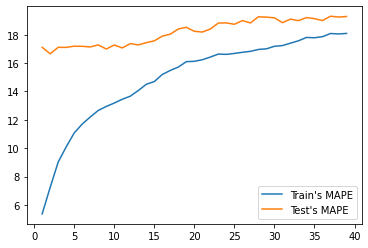

In [ ]:
# Show that how to tune a parameter
mapes_train = []
mapes_test = []
ticks=[]

for i in np.arange(1,40):
    model = RandomForestRegressor(min_samples_leaf=i)
    model.fit(X_train, y_train)

    train_mape = get_mape_model(model, X_train, y_train)
    mapes_train.append(train_mape)
    test_mape = get_mape_model(model, X_test, y_test)
    mapes_test.append(test_mape)
    ticks.append(i)

f = plt.figure()
plt.plot(ticks,mapes_train,label='Train\'s MAPE')
plt.plot(ticks,mapes_test,label='Test\'s MAPE')
plt.legend()

So as we can see, for balancing the overfitting and underfitting, the *min_samples_leaf* should be 16. According to this method, we can also choose the most suitable parameters for each model. 

In [ ]:
model = RandomForestRegressor(
        n_estimators=50,min_samples_leaf=16,max_depth=5,
        min_samples_split=60,min_weight_fraction_leaf=0.0,
        min_impurity_decrease=4)
model.fit(X_train, y_train)
print("RandomForestRegressor:")
show_result(model, X_train, y_train, X_test, y_test)

RandomForestRegressor:
		MAE	MAPE	R2	SMAPE	MSE
Train accurary:	5.80   	16.91%	0.65   	15.86%	61.22
Test accurary:	4.65   	18.71%	0.68   	14.49%	40.80


In [ ]:
model = XGBRegressor(
        max_depth=2,learning_rate=0.1,n_estimators=20,
        min_child_weight=10,objective ='reg:squarederror',booster="dart"
        ,subsample=0.55,colsample_bytree=0.7,reg_alpha=1.0,
        reg_lambda=1.6,base_score=0.8,random_state=1)
model.fit(X_train, y_train)
print("XGBRegressor:")
show_result(model, X_train, y_train, X_test, y_test)

XGBRegressor:
		MAE	MAPE	R2	SMAPE	MSE
Train accurary:	6.75   	16.53%	0.52   	17.56%	83.13
Test accurary:	4.92   	16.64%	0.66   	14.61%	44.26


In [ ]:
model = LGBMRegressor(
        objective='regression',n_estimators=20,learning_rate=0.1,
        max_depth=6,num_leaves=5,min_child_samples=20)
model.fit(X_train, y_train)
print("XGBRegressor:")
show_result(model, X_train, y_train, X_test, y_test)

XGBRegressor:
		MAE	MAPE	R2	SMAPE	MSE
Train accurary:	5.42   	15.87%	0.71   	14.79%	51.10
Test accurary:	4.55   	18.47%	0.72   	14.40%	36.60


#### 2.2.3 Auto Machine Learning

In [ ]:
%%capture
!pip install autogluon

In [ ]:
# If you get some problem when you try to import this module, most time you just need to restart the kernel.
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
df = source.copy()

# One-Hot Encoding
df = pd.get_dummies(df, columns=['AgencyId','AgentId'])

df = remove_outliers(df, columns=['X2','X3','X4','X5','X6','Y'])

from sklearn.utils import shuffle
df = shuffle(df,random_state=12).reset_index(drop=True)

# split data
split_point = int(len(df)*0.75)
train_data, test_data = df[:split_point], df[split_point:]

train_data = TabularDataset(train_data)
test_data = TabularDataset(test_data)
X_train = train_data.drop(columns=['Y'])
y_train = train_data['Y']
X_test = test_data.drop(columns=['Y'])
y_test = test_data['Y'].reset_index(drop=True)

# PCA
(X_train, X_test) = PCA_process(X_train, X_test, 2)

# remerge
X_train = pd.DataFrame(X_train, columns=['X1','X2'])
X_test = pd.DataFrame(X_test, columns=['X1','X2'])
train_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test],axis=1)
print('X train shape:', train_data.shape)
print('X test shape:', test_data.shape)

X train shape: (305, 3)
X test shape: (102, 3)


In [ ]:
%%time
# fit model
save_path = 'best_model'
model = TabularPredictor(label='Y', path=save_path).fit(
  train_data
)

Beginning AutoGluon training ...
AutoGluon will save models to "best_model/"
AutoGluon Version:  0.5.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    305
Train Data Columns: 2
Label Column: Y
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (78.0, 7.6, 37.52754, 12.38252)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11812.66 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the fea

CPU times: user 10.3 s, sys: 563 ms, total: 10.8 s
Wall time: 17.9 s


In [ ]:
model = TabularPredictor.load(save_path)

In [ ]:
show_result(model, X_train=train_data.drop(columns=['Y']), 
      y_train=train_data['Y'], X_test=test_data.drop(columns=['Y']), 
      y_test=test_data['Y'])

		MAE	MAPE	R2	SMAPE	MSE
Train accurary:	3.10   	9.24%	0.88   	8.78%	18.42
Test accurary:	4.50   	11.11%	0.75   	11.43%	50.49


#### 2.2.4 Best Model

According to the metrics of all models, the best model is *WeightedEnsemble_L2* based on Auto Machine Learning.

In [ ]:
best_model = TabularPredictor.load(save_path)
show_result(model, X_train=train_data.drop(columns=['Y']), 
      y_train=train_data['Y'], X_test=test_data.drop(columns=['Y']), 
      y_test=test_data['Y'])


		MAE	MAPE	R2	SMAPE	MSE
Train accurary:	3.10   	9.24%	0.88   	8.78%	18.42
Test accurary:	4.50   	11.11%	0.75   	11.43%	50.49


### 2.3 Task 7 – 10 points
> Analyze your results and answer the following questions: <br>
> •	Is your model overfitting? (Yes, No, cannot say), explain your answer. <br>
> •	Is your model underfitting? (Yes, No, cannot say), explain your answer. <br>
For this task, you should present the answers to the questions above.


**My Answer**:
- Is your model overfitting?
  - Yes, but it's not very serious. 
  - Because *the MAPE of train data* (9.24%) is slightly smaller than *the MAPE of test data* (11.11%), It show that the best model (*WeightedEnsemble_L2*) have the maximize predictive performance.
  - Another indication that the best model is a bit overfitting is that changing the value of random_state results in very different results. This indicates that the data is far from sufficient to support an overly complex model, so the model is overfitting with respect to the data. **So the reason for the overfitting of this model is that there are not enough data**.
- Is your model underfitting?
  - Cannot say. 
  - We can say the best model is not underfitting. Because in this task, the training models change from a *linear model* to a *random forest model* to the best model (*WeightedEnsemble_L2*) obtained by automatic machine learning. The complexity of their models gradually increases, but the predictive performance improves very slowly. This indicates that the models are gradually approaching the limit of the predictive performance limit that can be reached for this data, without demonstrating the characteristics of underfitting.
  - Also we can say that the answer is Yes as long as the model have more data or more features. The results of PCA processing (*PCA_processsss()*) show that the whole data can be almost reduced to only one to two columns. This indicates that the characteristics of the data are single and simple. **The reason for the underfitting of this model is that there are not enough features**.